## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
print(merged_data.count())
print(merged_data.nunique())

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64
Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicated_mice.count()

Mouse ID              10
Drug Regimen          10
Sex                   10
Age_months            10
Weight (g)            10
Timepoint             10
Tumor Volume (mm3)    10
Metastatic Sites      10
dtype: int64

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data.drop_duplicates(['Mouse ID', 'Timepoint'], keep='first')
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].count()
clean_data["Mouse ID"].nunique()

249

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_group = clean_data.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_data = (regimen_group["Tumor Volume (mm3)"]).mean()
median_data = regimen_group["Tumor Volume (mm3)"].median()
var_data = regimen_group["Tumor Volume (mm3)"].var()
std_data = regimen_group["Tumor Volume (mm3)"].std()
sem_data = regimen_group["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({
    "Mean Tumor" : mean_data,
    "Median Tumor" : median_data,
    "Variance": var_data,
    "STDev": std_data,
    "SEM": sem_data
})

summary_df

,Mean Tumor,Median Tumor,Variance,STDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


total_sum = regimen_group.agg({"Tumor Volume (mm3)": ["mean","median", "var", "std","sem"]}).rename(columns={"mean":"Tumor Mean", "median":"Tumor Median","var":"Variance", "std":"STDev", "sem":"SEM"})

total_sum

Tumor Volume (mm3)                                            
                     Tumor Mean Tumor Median   Variance     STDev       SEM
Drug Regimen                                                               
Capomulin             40.675741    41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172    51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795    51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638    53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565    52.509285  66.173479  8.134708  0.596466
Placebo               54.033581    52.288934  61.168083  7.821003  0.581331
Propriva              52.393463    50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745    40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149    52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507    51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Measurements')

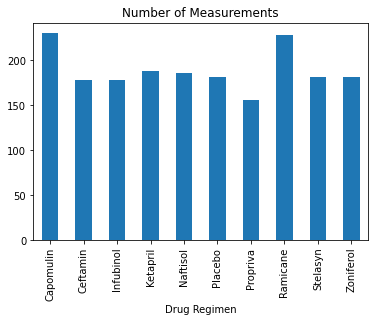

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements = regimen_group["Drug Regimen"].count()
measurements.plot(kind = "bar")
plt.title("Number of Measurements")

In [59]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(measurements))
y_axis =[x for x in measurements.index()]
ticks = [x for x in x_axis]
plt.bar(x_axis, regimen_group["Drug Regimen"].count())
plt.title("Number of Measurements")
plt.xticks(ticks, regimen_group["Drug Regimen"].unique(), rotation = "vertical")

y_axis

TypeError: 'Index' object is not callable

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
